In [1]:

import cv2
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import time
img='/Users/ansojung/final-project-level3-cv-15/serving/images/common.jpg'
#ckpt_model='/Users/ansojung/final-project-level3-cv-15/serving/models/biseNet_best_mIoU2_epoch_268.pth'
#config_file='/Users/ansojung/final-project-level3-cv-15/serving/models/hyuns_bise.py'
config_file = '/Users/ansojung/final-project-level3-cv-15/serving/models/sm_icnet.py'
ckpt_model = '/Users/ansojung/final-project-level3-cv-15/serving/models/newset_best_mIoU_epoch_82.pth'

model = init_segmentor(config_file, ckpt_model, device='cpu')

# plt.figure(figsize=(15,15))
# canvas=cv2.imread(img)
# canvas=cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR)
# plt.imshow(canvas)

load checkpoint from local path: /Users/ansojung/final-project-level3-cv-15/serving/models/newset_best_mIoU_epoch_82.pth


/opt/homebrew/Caskroom/miniforge/base/envs/sojung/lib/python3.8/site-packages/torch/nn/functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sojung/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/opt/homebrew/Caskroom/miniforge/base/envs/sojung/lib/python3.8/site-packages/mms

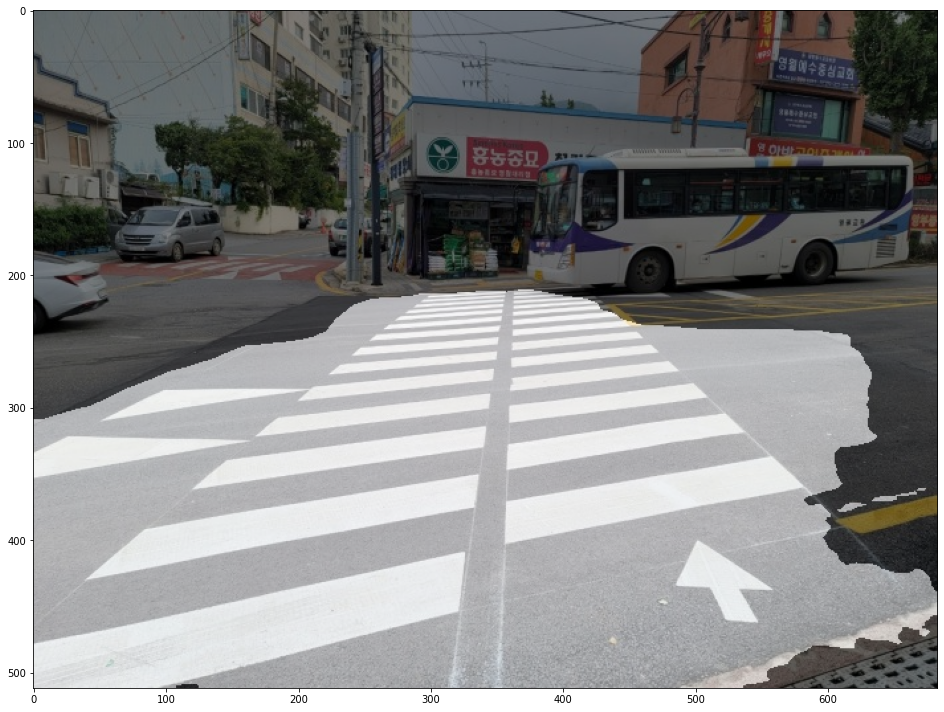

In [2]:
result = inference_segmentor(model, img)

PALETTE = [[0, 0, 0], [255, 255, 255]]


show_result_pyplot(model, img, result, palette=PALETTE)

19
넓이: 55.0
21
넓이: 57.5
4
넓이: 5.0
480
넓이: 165454.0


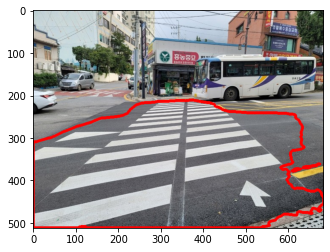

In [4]:

#masking 되어있는 모든 윤곽선을 가져외 찍기
import numpy as np
import matplotlib.pyplot as plt
result[0]=result[0].astype(np.uint8) #int8, int6 타입으로 변경해야 findContours을 사용가능

#ret, img_binary = cv2.threshold(result[0], 0.9, 255, 0)
contours_approx_simple, _ = cv2.findContours(result[0], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#print(len(contours_approx_simple))
canvas=cv2.imread(img)
canvas=cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR)
for cnt in contours_approx_simple:
    cv2.drawContours(canvas, [cnt], 0, (255, 0, 0), 5)
    a=cv2.contourArea(cnt)
    print(len(cnt))
    print("넓이:",a )

# plt.figure(figsize=(15,15))
plt.imshow(canvas)






In [15]:

print(img)
canvas=cv2.imread(img)

print(canvas.shape)

/Users/ansojung/final-project-level3-cv-15/serving/images/common.jpg
(512, 683, 3)


<class 'int'>
<class 'numpy.ndarray'>


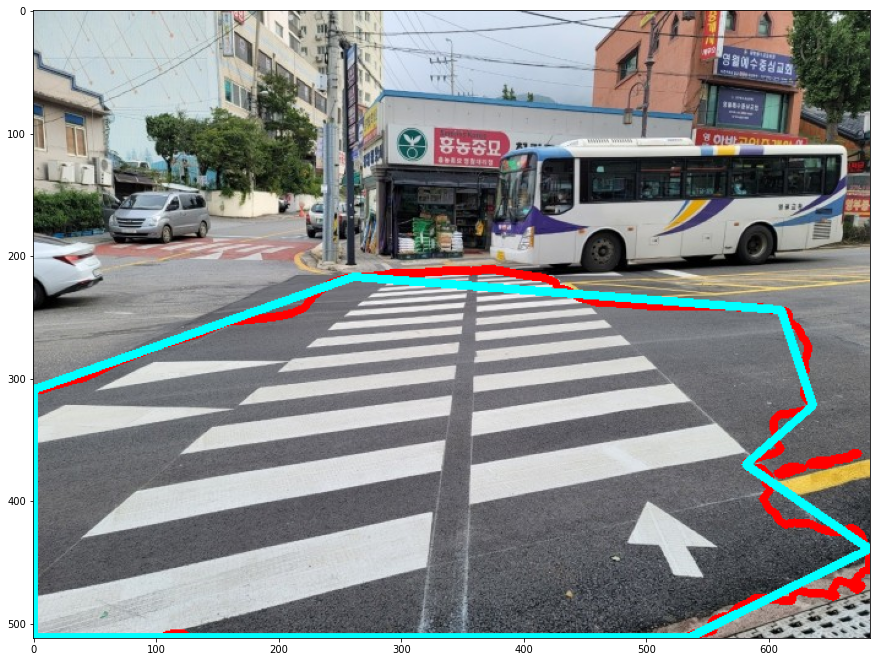

In [5]:
#윤곽선 좌표들을 -> 제일 넓은 영역만 polygon형태로 찍기(approx)

select=[0] 
approx_list=[0]
#print(type(select[0]))
for cnt in contours_approx_simple:
    
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    #print("approx깅길이획인:",len([approx][0]))
    #print("approx형태:",approx)


    #cv2.drawContours(canvas,[approx],0,(0,255,255),5)
    #print("approx 길이확인: ",len(approx))
    a=cv2.contourArea(approx)
    #print("a type:",type(a))
    #print(a)
    
    if a > select[0]:
        select.pop()
        approx_list.pop()
        select.append(a)
        approx_list.append([approx])
    else:
        continue
    
print(type(approx_list[0][0]))
cv2.drawContours(canvas,[approx],0,(0,255,255),5)

    



plt.figure(figsize=(15,15))
plt.imshow(canvas)

    

In [20]:
select=[0]
b=33.3

if int(b)> select[0]:
    print('success')

success
